In [1]:
import numpy as np
import pycuda.driver as cuda

In [2]:
import cv2

In [21]:
import numpy as np
import cv2
import pycuda.driver as drv
import pycuda.tools
import pycuda.autoinit
from pycuda.compiler import SourceModule
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("./lena.png", 0)
print(image.shape)

mod = SourceModule \
    (
"""                                                                                                                                                                              
                                                                                                                                                                                                                                                                                                                                                      
__global__
void blurKernel(unsigned char *in, unsigned char *out, int w, int h, int blur_size)
{
    int col = threadIdx.x + blockIdx.x * blockDim.x;
    int row = threadIdx.y + blockIdx.y * blockDim.y;
    if (col < w && row < h)
    {
        int pix_val = 0;
        int num_pix = 0;
        
        for (int blur_row = -blur_size; blur_row < blur_size + 1; ++blur_row) {
            for (int blur_col = -blur_size; blur_col < blur_size + 1; ++blur_col) {
                int cur_row = row + blur_row;
                int cur_col = col + blur_col;
                if (cur_row >= 0 && cur_row < h && cur_col >= 0 && cur_col < w) {
                    pix_val += in[cur_col + cur_row * w];
                    ++num_pix;
                }
            }
        }
        out[row * w + col] = (unsigned char)(pix_val / num_pix);
    }
}                                                                                                                       
                                                                                                                                                                                         
"""
)

h = 512
w = 512
#a = np.random.randint(0, 256, (rows, cols, 3), dtype=np.uint8)

blur = np.zeros((h, w)).astype(np.uint8)
blurK = mod.get_function("blurKernel")
blurK(drv.In(image), drv.Out(blur), np.intc(w), np.intc(h), np.intc(20), block=(16, 16, 1), grid=(32,32,1))

(512, 512)


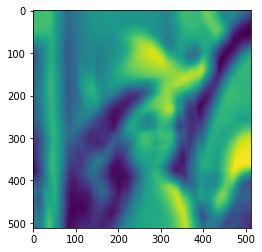

In [22]:
plt.imshow(blur)